#canny

In [2]:
import numpy as np
import cv2 as cv
import os
from google.colab.patches import cv2_imshow

os.chdir('/content/drive/MyDrive/week4')

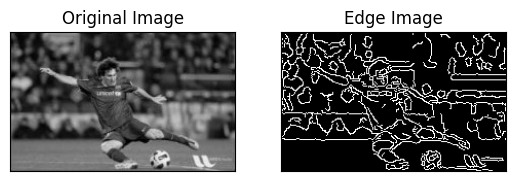

In [7]:

from matplotlib import pyplot as plt
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
  
# Applying the Canny Edge filter
edges = cv.Canny(img, t_lower, t_upper)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#harris corner detector

In [ ]:
import numpy as np
import cv2 as cv
filename = 'chessboard.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

#sift detector

In [4]:
import cv2
 
# Loading the image
img = cv2.imread('/content/drive/MyDrive/week4/geeks13.jpg')
 

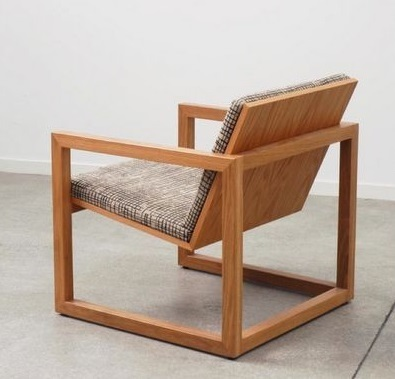

In [5]:
cv2_imshow(img)

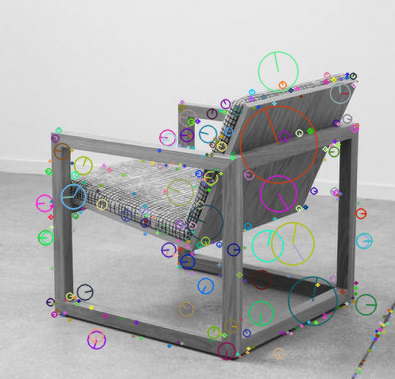

In [6]:

 # Converting image to grayscale
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
# Applying SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)
 
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
cv2_imshow(img)

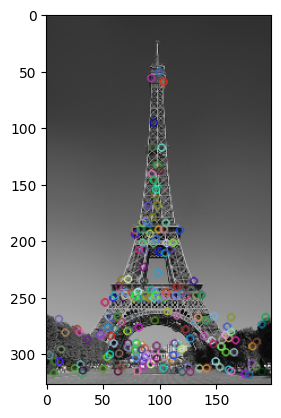

In [7]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('/content/drive/MyDrive/week4/eifel1.png')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

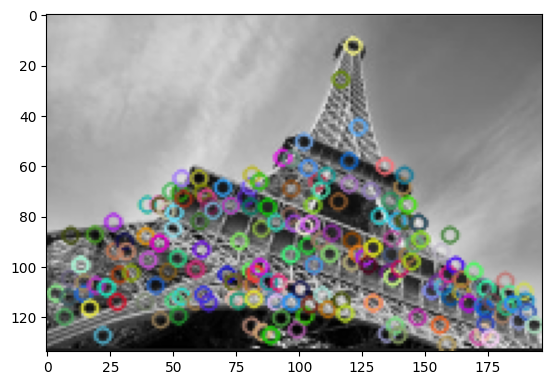

In [9]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img2 = cv2.imread('/content/drive/MyDrive/week4/eifel2.png')  
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

img_2 = cv2.drawKeypoints(gray2,keypoints_2,img2)
plt.imshow(img_2)

In [10]:
len(keypoints_1), len(keypoints_2)

(217, 215)

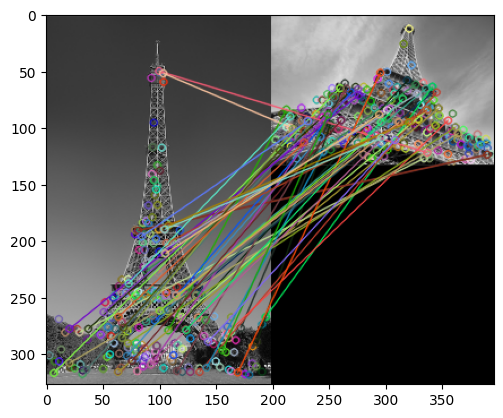

(<matplotlib.image.AxesImage at 0x7f4f9d304d30>, None)

In [11]:

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [13]:
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 22.8 MB/s eta 0:00:00


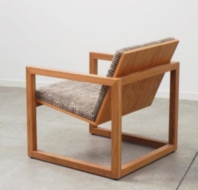

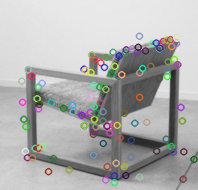

128


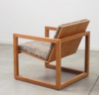

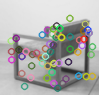

62


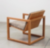

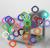

38


8


In [7]:
import cv2
import matplotlib.pyplot as plt
  
img = cv2.imread("/content/drive/MyDrive/week4/geeks13.jpg")
  
layer = img.copy()
  
for i in range(4):
    
    # using pyrDown() function
    layer = cv2.pyrDown(layer)
  
    # plt.imshow(layer)
    cv2_imshow( layer)
    gray2 = cv2.cvtColor(layer, cv2.COLOR_BGR2GRAY)

    #keypoints
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints_2, descriptors_2 = sift.detectAndCompute(gray2,None)

    img_2 = cv2.drawKeypoints(gray2,keypoints_2,gray2)
    cv2_imshow(img_2)
    print(len(keypoints_2))
      
  
# cv2.destroyAllWindows()